In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:/ML/Summer22_FootballTransfers.csv")

# dropping cost and date of transfer
data = data.drop('name',axis=1)
data = data.drop('date_of_transfer',axis=1)

# dropping '€' , '.' , 'm' , 'Th'
data['cost']=data['cost'].str.replace("€",'').str.replace('m',"0000").str.replace(".","").str.replace("Th","000").astype('float64')

data.head(10)

C:\Users\7fno\AppData\Local\Temp/ipykernel_1724/3473320341.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['cost']=data['cost'].str.replace("€",'').str.replace('m',"0000").str.replace(".","").str.replace("Th","000").astype('float64')


,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost
0,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000.0
1,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000.0
2,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000.0
3,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000.0
4,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000.0
5,Defensive Midfield,27.0,Wolverhampton Wanderers,Premier League,England,Aston Villa,Premier League,England,28000000.0
6,Centre-Forward,28.0,Stade Rennais FC,Ligue 1,France,OGC Nice,Ligue 1,France,18000000.0
7,Centre-Forward,33.0,FC Barcelona,LaLiga,Spain,Chelsea FC,Premier League,England,15000000.0
8,Centre-Forward,22.0,FC Groningen,Eredivisie,Netherlands,Celta de Vigo,LaLiga,Spain,6000000.0
9,Central Midfield,21.0,Chelsea FC,Premier League,England,Brighton & Hove Albion,Premier League,England,12000000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33625 entries, 0 to 33624
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   position             33615 non-null  object 
 1   age                  33477 non-null  float64
 2   origin_club          33620 non-null  object 
 3   league_origin_club   32685 non-null  object 
 4   country_origin_club  32690 non-null  object 
 5   new_club             33615 non-null  object 
 6   league_new_club      28047 non-null  object 
 7   country_new_club     28051 non-null  object 
 8   cost                 33621 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.3+ MB


In [4]:
# knowledge numper of duplication
print(sum(data.duplicated())) 

# deleting duplication
data.drop_duplicates(inplace=True)
print(sum(data.duplicated()))

45
0


In [5]:
# knowledge the nuns
data.isnull().sum()

position                 10
age                     147
origin_club               5
league_origin_club      940
country_origin_club     935
new_club                 10
league_new_club        5558
country_new_club       5554
cost                      4
dtype: int64

In [7]:
#droping nun and filling with the mean in the numerical data (age , cost)
data['age'].fillna(int(data['age'].mean()),inplace=True)
data['cost'].fillna(int(data['cost'].mean()),inplace=True)
# droping nun and filling with 'unknown'
data['position'].fillna('unknown', inplace = True)
data['origin_club'].fillna('unknown', inplace = True)
data['league_origin_club'].fillna('unknown',inplace=True)
data['country_origin_club'].fillna('unknown',inplace=True)
data['new_club'].fillna('unknown',inplace=True)
data['league_new_club'].fillna('unknown',inplace=True)
data['country_new_club'].fillna('unknown',inplace=True)

data.isnull().sum()

position               0
age                    0
origin_club            0
league_origin_club     0
country_origin_club    0
new_club               0
league_new_club        0
country_new_club       0
cost                   0
dtype: int64

In [8]:
#transform data from categorical to numerical
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
data['position'] = lbl.fit_transform(data['position'])
data['origin_club'] = lbl.fit_transform(data['origin_club'])
data['league_origin_club'] = lbl.fit_transform(data['league_origin_club'])
data['country_origin_club'] = lbl.fit_transform(data['country_origin_club'])
data['new_club']=lbl.fit_transform(data['new_club'])
data['league_new_club']=lbl.fit_transform(data['league_new_club'])
data['country_new_club']=lbl.fit_transform(data['country_new_club'])



In [9]:
data.describe()

,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost
count,33580.000000,33580.000000,33580.000000,33580.000000,33580.000000,33580.000000,33580.000000,33580.000000,3.358000e+04
mean,4.914592,25.025164,3043.238684,250.290381,80.892764,3626.117749,275.846546,83.307594,4.788591e+05
std,3.760834,4.773863,1704.349279,132.380775,43.134023,1990.764331,145.482846,42.136920,2.430705e+06
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+03
25%,2.000000,21.000000,1621.000000,138.000000,50.000000,1906.000000,159.000000,47.000000,5.000000e+04
50%,4.000000,24.000000,3034.000000,303.000000,67.000000,3752.000000,316.000000,85.000000,1.000000e+05
75%,8.000000,28.000000,4532.000000,361.000000,122.000000,5578.250000,387.000000,120.000000,2.500000e+05
max,16.000000,46.000000,5819.000000,462.000000,153.000000,6317.000000,463.000000,139.000000,1.500000e+08


<AxesSubplot:>

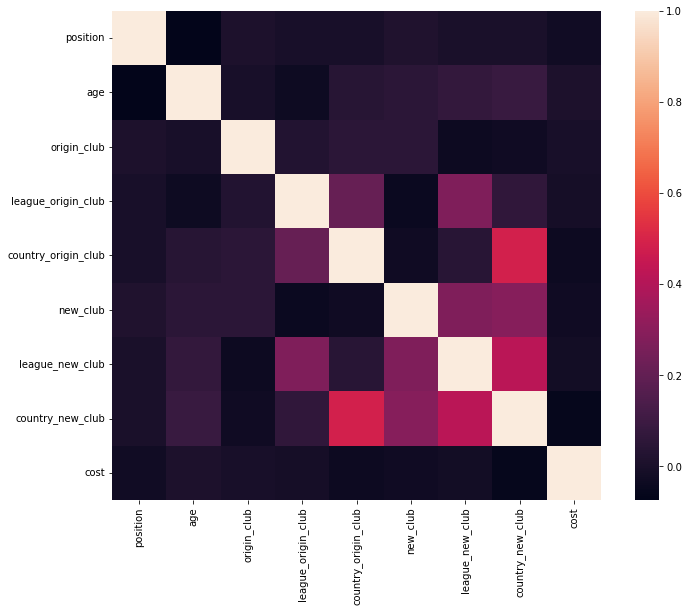

In [10]:
# knowledge of the correlation between data and cost
import matplotlib.pyplot as plt
import seaborn as sns
cormat = data.corr()
f,ax = plt.subplots(figsize =(12,9))
sns.heatmap (cormat , vmax = 1, square = True)

In [11]:
# split data to X and y
X = data.drop('cost',axis=1)
y = data['cost']


In [12]:
# Splitting data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=.2, shuffle = False)

In [14]:
# RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor     
model = RandomForestRegressor(n_estimators=300 ,max_depth=20 ,n_jobs = -1,random_state=50)
model.fit(X_train,y_train)


0.9201011528607161
-0.8090337515651029


In [16]:
y_pred = model.predict(X_test)

In [17]:
# Mean error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)/100000
mae


2.7865968063428737

In [22]:
print(y_pred[0:10]/100000)
print(y_test[0:10]/100000)

[17.49234649  2.12956492  3.10983601 34.67058248  1.51369917  0.32009274
  1.94729614  0.92621735  2.4688373   2.57580677]
26882     8.00
26883     0.50
26884     2.00
26885    25.00
26886     2.50
26887     0.10
26888     3.00
26889     2.25
26890     0.75
26891     6.00
Name: cost, dtype: float64


c:\Users\7fno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost'>

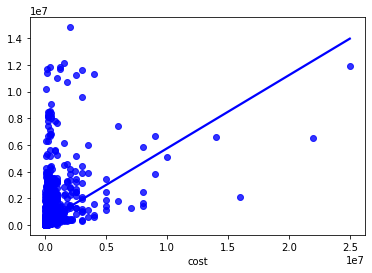

In [19]:
sns.regplot(y_test , y_pred ,ci =None ,color = 'blue')

In [23]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor(n_estimators = 80 , loss = 'lad',learning_rate= .2, max_depth = 3)
model2.fit(X_train, y_train)

c:\Users\7fno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.2, loss='lad', n_estimators=80)

In [24]:
y_pred2 = model2.predict(X_test) 

In [26]:
mae2 =mean_absolute_error(y_pred2 , y_test)/100000
mae2

1.2969083582230119

In [28]:
print(y_pred2[10:20]/100000)
print(y_test[10:20]/100000)

[1.04606371 0.96990122 1.43898615 1.7367394  1.87745801 2.48370524
 1.46953289 3.85730103 2.13636798 1.98286737]
26892     1.00
26893     0.75
26894     4.50
26895     6.00
26896     8.00
26897     0.25
26898     1.00
26899    13.00
26900     1.50
26901     1.00
Name: cost, dtype: float64


c:\Users\7fno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost'>

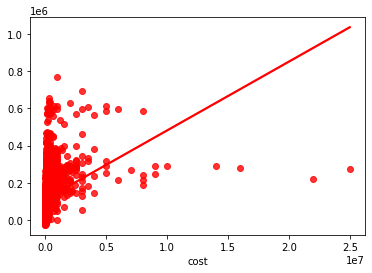

In [29]:
sns.regplot(y_test , y_pred2 ,ci =None ,color = 'red')

Decision Tree Regressor

In [33]:
#DECISIO TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor (max_depth=10,random_state = 44)
model3.fit(X_train,y_train)



DecisionTreeRegressor(max_depth=10, random_state=44)

In [34]:
y_pred3 = model3.predict(X_test)


In [35]:
mae3 = mean_absolute_error(y_pred3,y_test) /100000
mae3

3.226389301350356

In [37]:
print(y_pred3[10:20]/100000)
print(y_test[10:20]/100000)

[ 2.23378378  1.40202096  5.79230769  1.40202096  2.15789474  2.85843373
  1.25       10.5326087   1.36689189  1.45212766]
26892     1.00
26893     0.75
26894     4.50
26895     6.00
26896     8.00
26897     0.25
26898     1.00
26899    13.00
26900     1.50
26901     1.00
Name: cost, dtype: float64


c:\Users\7fno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost'>

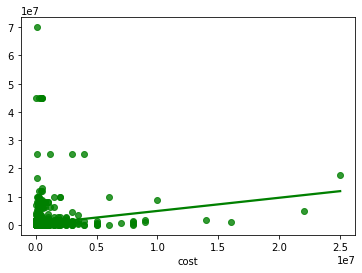

In [38]:
sns.regplot(y_test , y_pred3 ,ci =None ,color = 'green')

In [43]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor(n_neighbors = 10 , algorithm= 'kd_tree' , weights = 'distance')
model4.fit(X_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10, weights='distance')

In [48]:
y_pred4 = model4.predict(X_test)


In [49]:
mae4 = mean_absolute_error(y_pred4, y_test)/100000
mae4

2.5611301774461275

In [50]:
print(y_pred4[0:10]/100000)
print(y_test[0:10]/100000)

[ 3.9561897   2.41787864  4.01110407 10.88193912  1.13346273  2.46560873
  3.44044599  0.91222394  1.65226115  0.86117514]
26882     8.00
26883     0.50
26884     2.00
26885    25.00
26886     2.50
26887     0.10
26888     3.00
26889     2.25
26890     0.75
26891     6.00
Name: cost, dtype: float64


c:\Users\7fno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost'>

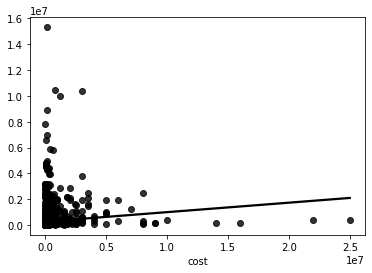

In [51]:
sns.regplot(y_test , y_pred4 ,ci =None ,color = 'black')